##Autoencoding is a powerful technique in machine learning for unsupervised learning tasks, particularly in the realm of numerical data. By leveraging artificial neural networks, autoencoders can efficiently capture and represent the underlying structure within high-dimensional datasets. In the context of numerical data, such as sensor readings, financial metrics, or physical measurements, autoencoding aims to learn a compressed, latent representation of the input features while preserving essential information. This is achieved through an encoder-decoder architecture, where the encoder compresses the input data into a lower-dimensional representation (encoding), and the decoder reconstructs the original input from this representation (decoding). By minimizing the reconstruction error between the input and output, the autoencoder learns to extract meaningful features and patterns from the data. This learned representation can then be utilized for various downstream tasks, including anomaly detection, data denoising, and dimensionality reduction, thus facilitating more efficient and effective data analysis and interpretation.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense


In [2]:
df=pd.read_csv('/content/ship.csv')
df.head()

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [3]:
df=df.drop(columns='index',axis=1)
df

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


In [4]:
# Define the new column names
new_column_names = [
    'lever_position', 'ship_speed', 'gt_shaft_torque', 'gt_rate_of_revolutions',
    'gas_generator_rate_of_revolutions', 'starboard_propeller_torque', 'port_propeller_torque',
    'hp_turbine_exit_temperature', 'gt_compressor_inlet_air_temperature',
    'gt_compressor_outlet_air_temperature', 'hp_turbine_exit_pressure',
    'gt_compressor_inlet_air_pressure', 'gt_compressor_outlet_air_pressure',
    'gt_exhaust_gas_pressure', 'turbine_injection_control', 'fuel_flow',
    'gt_compressor_decay_state_coefficient', 'gt_turbine_decay_state_coefficient'
]

# Rename the columns
df.columns = new_column_names

# Check the updated column names
print(df.columns)

Index(['lever_position', 'ship_speed', 'gt_shaft_torque',
       'gt_rate_of_revolutions', 'gas_generator_rate_of_revolutions',
       'starboard_propeller_torque', 'port_propeller_torque',
       'hp_turbine_exit_temperature', 'gt_compressor_inlet_air_temperature',
       'gt_compressor_outlet_air_temperature', 'hp_turbine_exit_pressure',
       'gt_compressor_inlet_air_pressure', 'gt_compressor_outlet_air_pressure',
       'gt_exhaust_gas_pressure', 'turbine_injection_control', 'fuel_flow',
       'gt_compressor_decay_state_coefficient',
       'gt_turbine_decay_state_coefficient'],
      dtype='object')


In [5]:
df

,lever_position,ship_speed,gt_shaft_torque,gt_rate_of_revolutions,gas_generator_rate_of_revolutions,starboard_propeller_torque,port_propeller_torque,hp_turbine_exit_temperature,gt_compressor_inlet_air_temperature,gt_compressor_outlet_air_temperature,hp_turbine_exit_pressure,gt_compressor_inlet_air_pressure,gt_compressor_outlet_air_pressure,gt_exhaust_gas_pressure,turbine_injection_control,fuel_flow,gt_compressor_decay_state_coefficient,gt_turbine_decay_state_coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


In [6]:
# Select features
features = ['lever_position', 'ship_speed', 'gt_shaft_torque', 'gt_rate_of_revolutions',
            'gas_generator_rate_of_revolutions', 'starboard_propeller_torque',
            'port_propeller_torque', 'hp_turbine_exit_temperature',
            'gt_compressor_inlet_air_temperature', 'gt_compressor_outlet_air_temperature',
            'hp_turbine_exit_pressure', 'gt_compressor_inlet_air_pressure',
            'gt_compressor_outlet_air_pressure', 'gt_exhaust_gas_pressure',
            'turbine_injection_control', 'fuel_flow', 'gt_compressor_decay_state_coefficient',
            'gt_turbine_decay_state_coefficient']

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [7]:
#Split Data: Split the data into training and testing sets.
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)


In [10]:
# Build Autoencoder Model: Define the architecture of the autoencoder model.
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(12, activation='relu')(input_layer)
encoded = Dense(6, activation='relu')(encoded)

decoded = Dense(12, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [11]:
#Train the Model: Train the autoencoder model using the training data.
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(X_test, X_test))


Epoch 1/50
299/299 [==============================] - 2s 4ms/step - loss: 0.4645 - val_loss: 0.1230
Epoch 2/50
299/299 [==============================] - 1s 3ms/step - loss: 0.1042 - val_loss: 0.0802
Epoch 3/50
299/299 [==============================] - 1s 5ms/step - loss: 0.0654 - val_loss: 0.0489
Epoch 4/50
299/299 [==============================] - 1s 3ms/step - loss: 0.0224 - val_loss: 0.0102
Epoch 5/50
299/299 [==============================] - 1s 3ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 6/50
299/299 [==============================] - 1s 3ms/step - loss: 0.0072 - val_loss: 0.0067
Epoch 7/50
299/299 [==============================] - 1s 3ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 8/50
299/299 [==============================] - 1s 3ms/step - loss: 0.0063 - val_loss: 0.0061
Epoch 9/50
299/299 [==============================] - 1s 3ms/step - loss: 0.0061 - val_loss: 0.0059
Epoch 10/50
299/299 [==============================] - 1s 3ms/step - loss: 0.0059 - val_loss: 0.0056

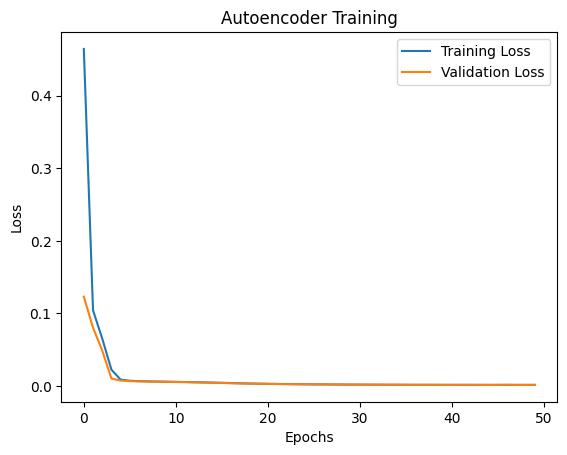

In [12]:
#Evaluate Model: Evaluate the model's performance and visualize the loss.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Autoencoder Training')
plt.legend()
plt.show()


Throughout all epochs, the validation loss remains nearly constant.
Unlike the training loss, it doesn’t decrease significantly.
